In [1]:
import tsplib95
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib

In [2]:
def load_TSP(file_path: str) -> np.ndarray:
    """This function takes the file path of TSP problem set as
        input, load the file then take the x and y coordinates of
        cities as output

    Args:
        file_path (str): the file path of TSP problem set

    Returns:
        numpy.array: Euclidean coordinates of cities
    """
    
    # Load the TSP problem set
    problem = tsplib95.load(file_path)
    # Count the number of cities
    n_cities = len(problem.node_coords)
    
    # Initialize the x and y coordinates
    x_coordinates = np.zeros(n_cities)
    y_coordinates = np.zeros(n_cities)

    # Load the x and y coordinates for each city as output
    for i in range(n_cities):
        x_coordinates[i] = list(problem.node_coords.items())[i][1][0]
        y_coordinates[i] = list(problem.node_coords.items())[i][1][1]
        
    return x_coordinates, y_coordinates

In [3]:
EIL51_COORDINATES = load_TSP('TSP-Configurations/eil51.tsp')
A280_COORDINATES = load_TSP('TSP-Configurations/a280.tsp')
PCB442_COORDINATES = load_TSP('TSP-Configurations/pcb442.tsp')

In [4]:
data_eil51 = np.load('Scaling_results/data_eil51.npy', allow_pickle=True)
data_a280 = np.load('Scaling_results/data_a280.npy', allow_pickle=True)
data_pcb442 = np.load('Scaling_results/data_pcb442.npy', allow_pickle=True)

In [5]:
# Load the TSP settings
eil51_x, eil51_y = EIL51_COORDINATES[0], EIL51_COORDINATES[1]
a280_x, a280_y = A280_COORDINATES[0], A280_COORDINATES[1]
pcb442_x, pcb442_y = PCB442_COORDINATES[0], PCB442_COORDINATES[1]

x_coor_list = [eil51_x, a280_x, pcb442_x]

rng = np.random.default_rng(seed=42)

i_sols = []

for i in range(3):
    # Initialize the route
    i_sol = np.arange(0, len(x_coor_list[i]))
    # Randomly permute the route
    i_sol = rng.permuted(i_sol)
    # The salesman must return to the start city
    i_sol = np.append(i_sol, i_sol[0])
    
    i_sols.append(i_sol)

In [6]:
# Global plot settings
matplotlib.rc('xtick', labelsize=15)
matplotlib.rc('ytick', labelsize=15)
# matplotlib.rc('title', fontsize=25)

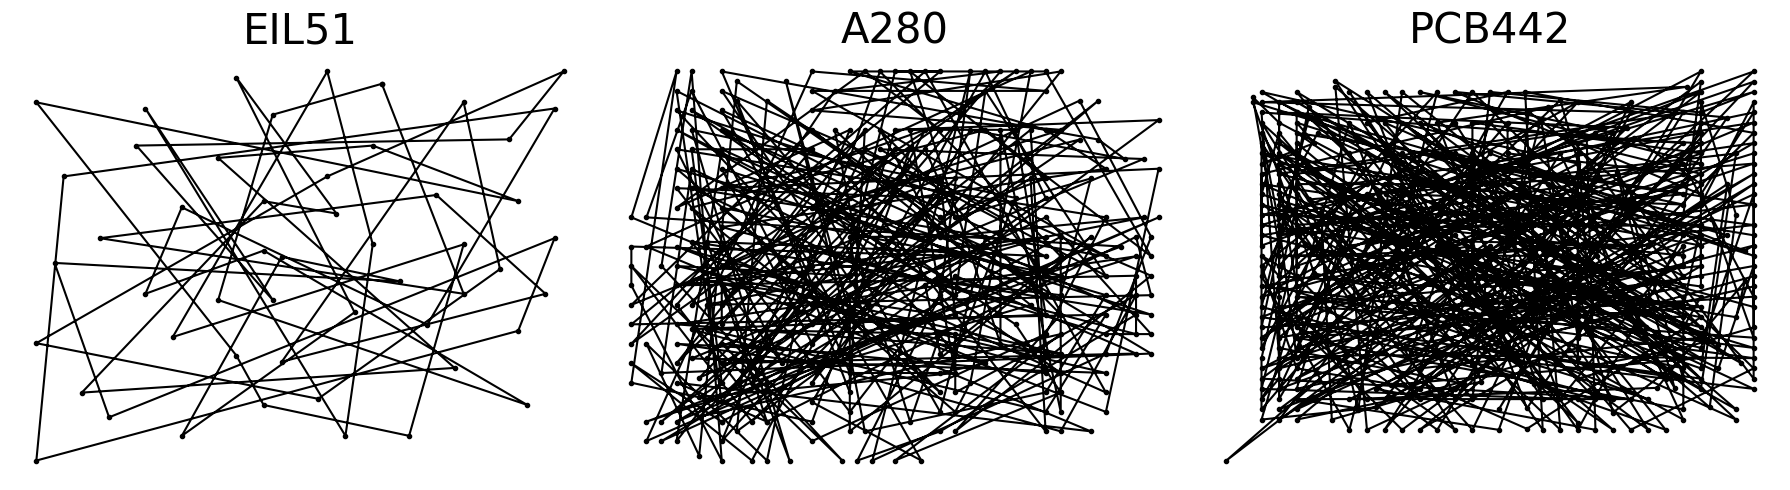

In [7]:
plt.rcParams['figure.figsize'] = (18, 5)
fig1, ax1 = plt.subplots(1, 3)

ax1[0].scatter(eil51_x[i_sols[0]], eil51_y[i_sols[0]], marker='.', c='k')
ax1[0].plot(eil51_x[i_sols[0]], eil51_y[i_sols[0]], 'k')
ax1[0].axis('off')
ax1[0].set_title('EIL51', fontsize=30)

ax1[1].scatter(a280_x[i_sols[1]], a280_y[i_sols[1]], marker='.', c='k')
ax1[1].plot(a280_x[i_sols[1]], a280_y[i_sols[1]], 'k')
ax1[1].axis('off')
ax1[1].set_title('A280', fontsize=30)

ax1[2].scatter(pcb442_x[i_sols[2]], pcb442_y[i_sols[2]], marker='.', c='k')
ax1[2].plot(pcb442_x[i_sols[2]], pcb442_y[i_sols[2]], 'k')
ax1[2].axis('off')
ax1[2].set_title('PCB442', fontsize=30)

plt.tight_layout()
plt.show()

In [8]:
fig1.savefig('Plots/Initial_solutions_3set.pdf', bbox_inches='tight')

In [9]:
cost_eil51 = data_eil51[:, 1]
cost_a280 = data_a280[:, 1]
cost_pcb442 = data_pcb442[:, 1]

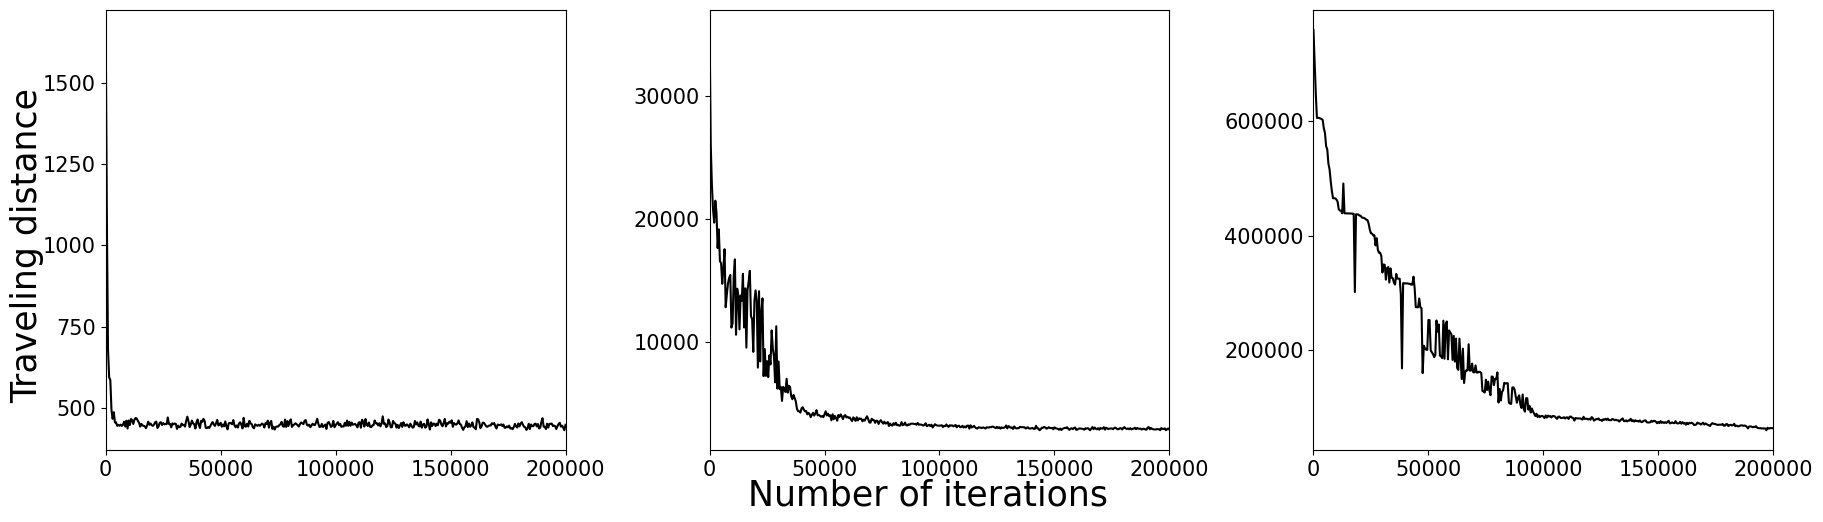

In [10]:
plt.rcParams['figure.figsize'] = (18, 5)
fig2, ax2 = plt.subplots(1, 3)

x_axis = np.linspace(1, 200000, 401, dtype=int)

ax2[0].plot(x_axis, cost_eil51, 'k')
ax2[0].locator_params(nbins=6)
ax2[0].set_xlim(0, 200000)

ax2[1].plot(x_axis, cost_a280, 'k')
ax2[1].locator_params(nbins=6)
ax2[1].set_xlim(0, 200000)

ax2[2].plot(x_axis, cost_pcb442, 'k')
ax2[2].locator_params(nbins=6)
ax2[2].set_xlim(0, 200000)

fig2.text(0.5, -0.02, 'Number of iterations', ha='center', fontsize=25)
fig2.text(-0.01, 0.5, 'Traveling distance', va='center', rotation='vertical', fontsize=25)

plt.tight_layout()
plt.show()

In [11]:
fig2.savefig('Plots/Simulated_annealing_results_3set.pdf', bbox_inches='tight')

In [12]:
bsols_eil51 = data_eil51[:, 0]
bsols_a280 = data_a280[:, 0]
bsols_pcb442 = data_pcb442[:, 0]

In [13]:
print(cost_eil51.argmin(), end=', ')
print(cost_a280.argmin(), end=', ')
print(cost_pcb442.argmin())

399, 331, 394


In [14]:
bsol_eil51 = bsols_eil51[cost_eil51.argmin()]
bsol_a280 = bsols_a280[cost_a280.argmin()]
bsol_pcb442 = bsols_pcb442[cost_pcb442.argmin()]

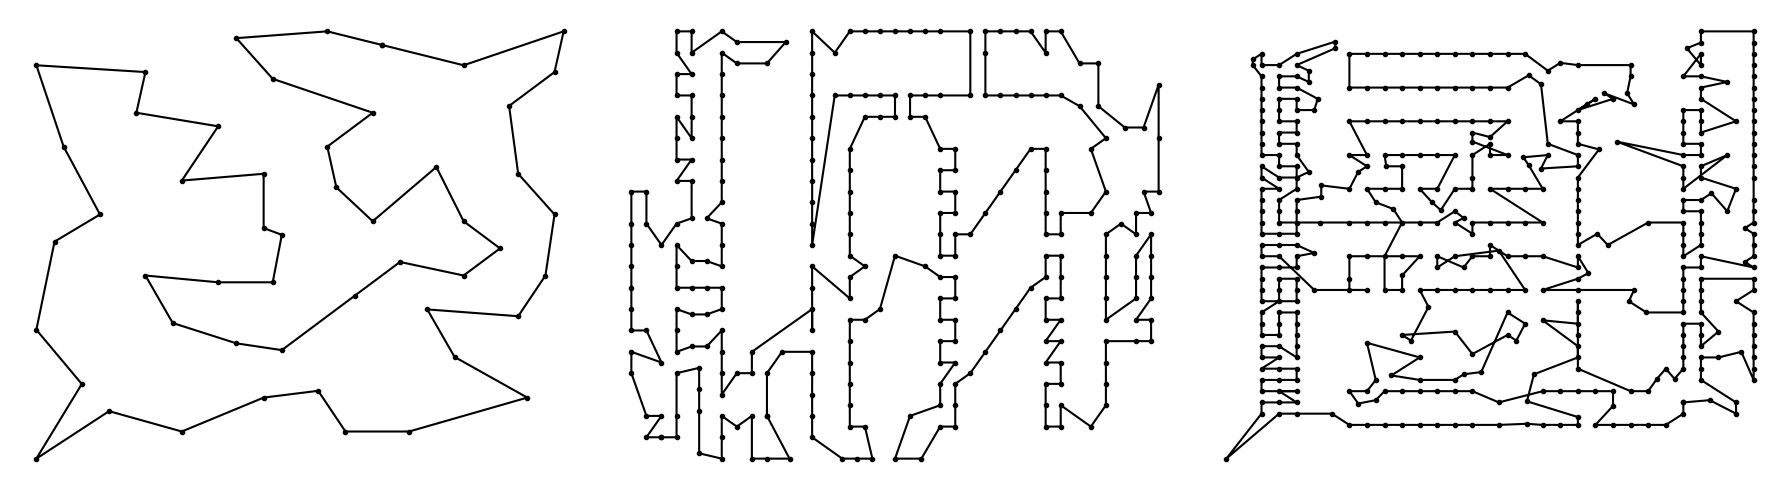

In [15]:
plt.rcParams['figure.figsize'] = (18, 5)
fig3, ax3 = plt.subplots(1, 3)

ax3[0].scatter(eil51_x[bsol_eil51], eil51_y[bsol_eil51], marker='.', c='k')
ax3[0].plot(eil51_x[bsol_eil51], eil51_y[bsol_eil51], 'k')
ax3[0].axis('off')

ax3[1].scatter(a280_x[bsol_a280], a280_y[bsol_a280], marker='.', c='k')
ax3[1].plot(a280_x[bsol_a280], a280_y[bsol_a280], 'k')
ax3[1].axis('off')

ax3[2].scatter(pcb442_x[bsol_pcb442], pcb442_y[bsol_pcb442], marker='.', c='k')
ax3[2].plot(pcb442_x[bsol_pcb442], pcb442_y[bsol_pcb442], 'k')
ax3[2].axis('off')

plt.tight_layout()
plt.show()

In [16]:
fig3.savefig('Plots/Best_solutions_3set.pdf', bbox_inches='tight')

In [17]:
df = pd.DataFrame(columns=['ite','cost','cooling schedule','repetition'])

for i in range(50):
    df_temp = pd.read_csv(f'Cooling_scheduling_results/50_1000000/data_pandas_{i+1}.csv')
    df = pd.concat([df, df_temp], ignore_index=True)

In [18]:
df_adaptive = pd.DataFrame(columns=['ite','cost','cooling schedule','repetition'])

for i in range(50):
    df_temp = pd.read_csv(f'Cooling_scheduling_results/50_1000000/data_adaptive_{i+1}.csv')
    df_adaptive = pd.concat([df_adaptive, df_temp], ignore_index=True)

In [19]:
df[df['cooling schedule'] == 'adaptive'] = df_adaptive

In [20]:
df_back_tail = df[df['ite'] >= 100000]

In [21]:
# Global plot settings
matplotlib.rc('xtick', labelsize=15)
matplotlib.rc('ytick', labelsize=15)
# matplotlib.rc('title', fontsize=25)

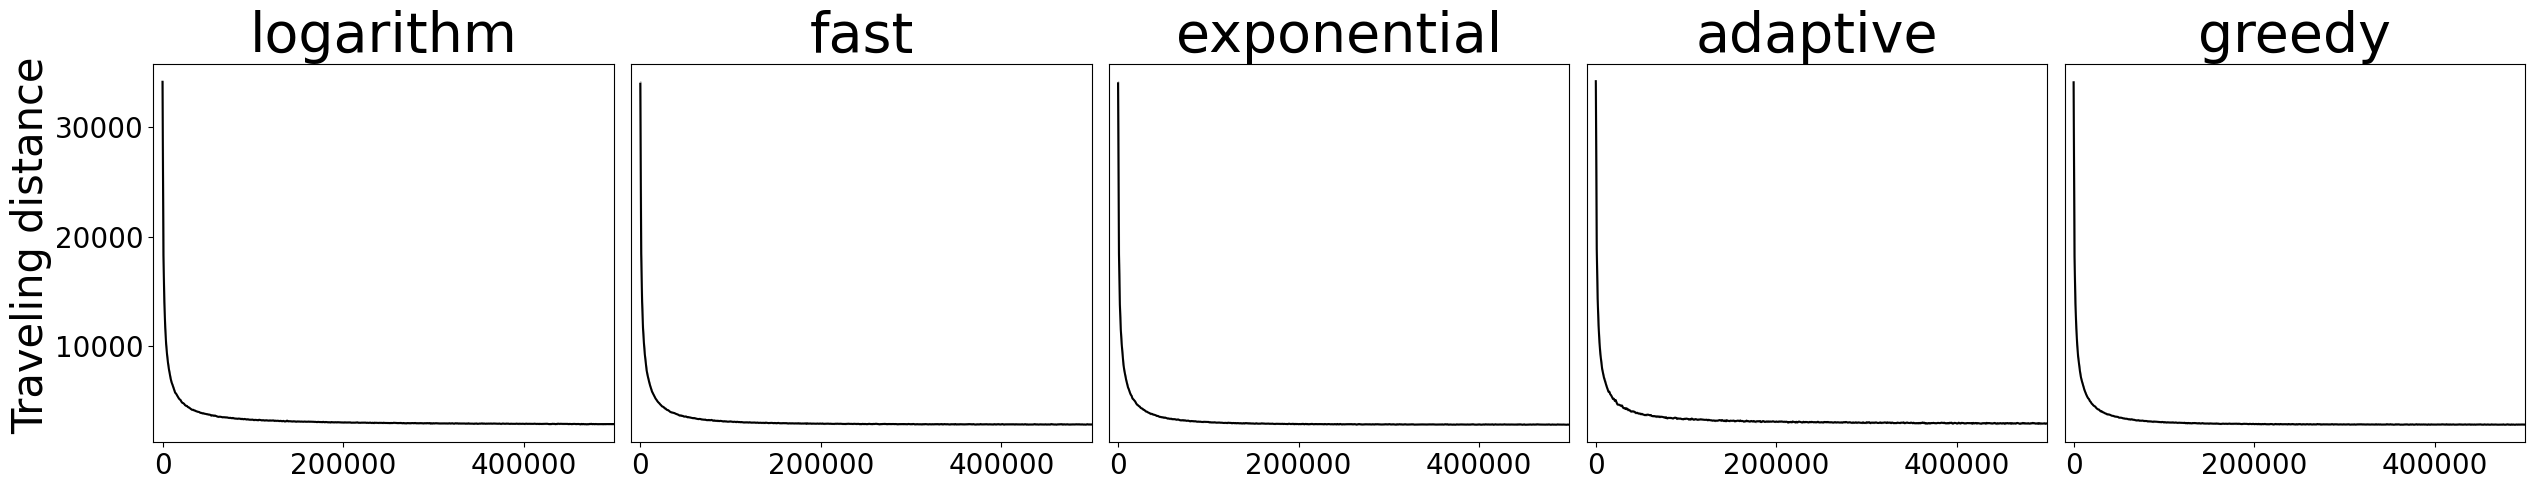

In [22]:
plt.rcParams['figure.figsize'] = (25, 5)

fig4, ax4 = plt.subplots(1, 5)

models = ['log', 'fast', 'exp', 'adaptive', 'greedy']
names = ['logarithm', 'fast', 'exponential', 'adaptive', 'greedy']

for i in range(5):
    sns_cost = sns.lineplot(data=df[df['cooling schedule'] == models[i]], x='ite', y='cost', \
                            errorbar='ci', n_boot=2, ax=ax4[i], color='k')
    # ax4[i].legend([f'{models[i]}', '_nolegend_'])
    ax4[i].set_title(f'{names[i]}', fontsize=40)
    ax4[i].set_xlabel('')
    ax4[i].set_ylabel('')
    ax4[i].set_xlim(-10000, 500000)
    ax4[i].locator_params(nbins=4)
    ax4[i].tick_params(labelsize=20)
    
    if i != 0:
        ax4[i].tick_params(left=False, labelleft=False)

# fig4.text(0.5, -0.032, 'Number of iterations', ha='center', fontsize=25)
fig4.text(-0.012, 0.5, 'Traveling distance', va='center', rotation='vertical', fontsize=30)
        
plt.tight_layout()
plt.show()

In [23]:
fig4.savefig('Plots/SA_results_30_repetitions.pdf', bbox_inches='tight')

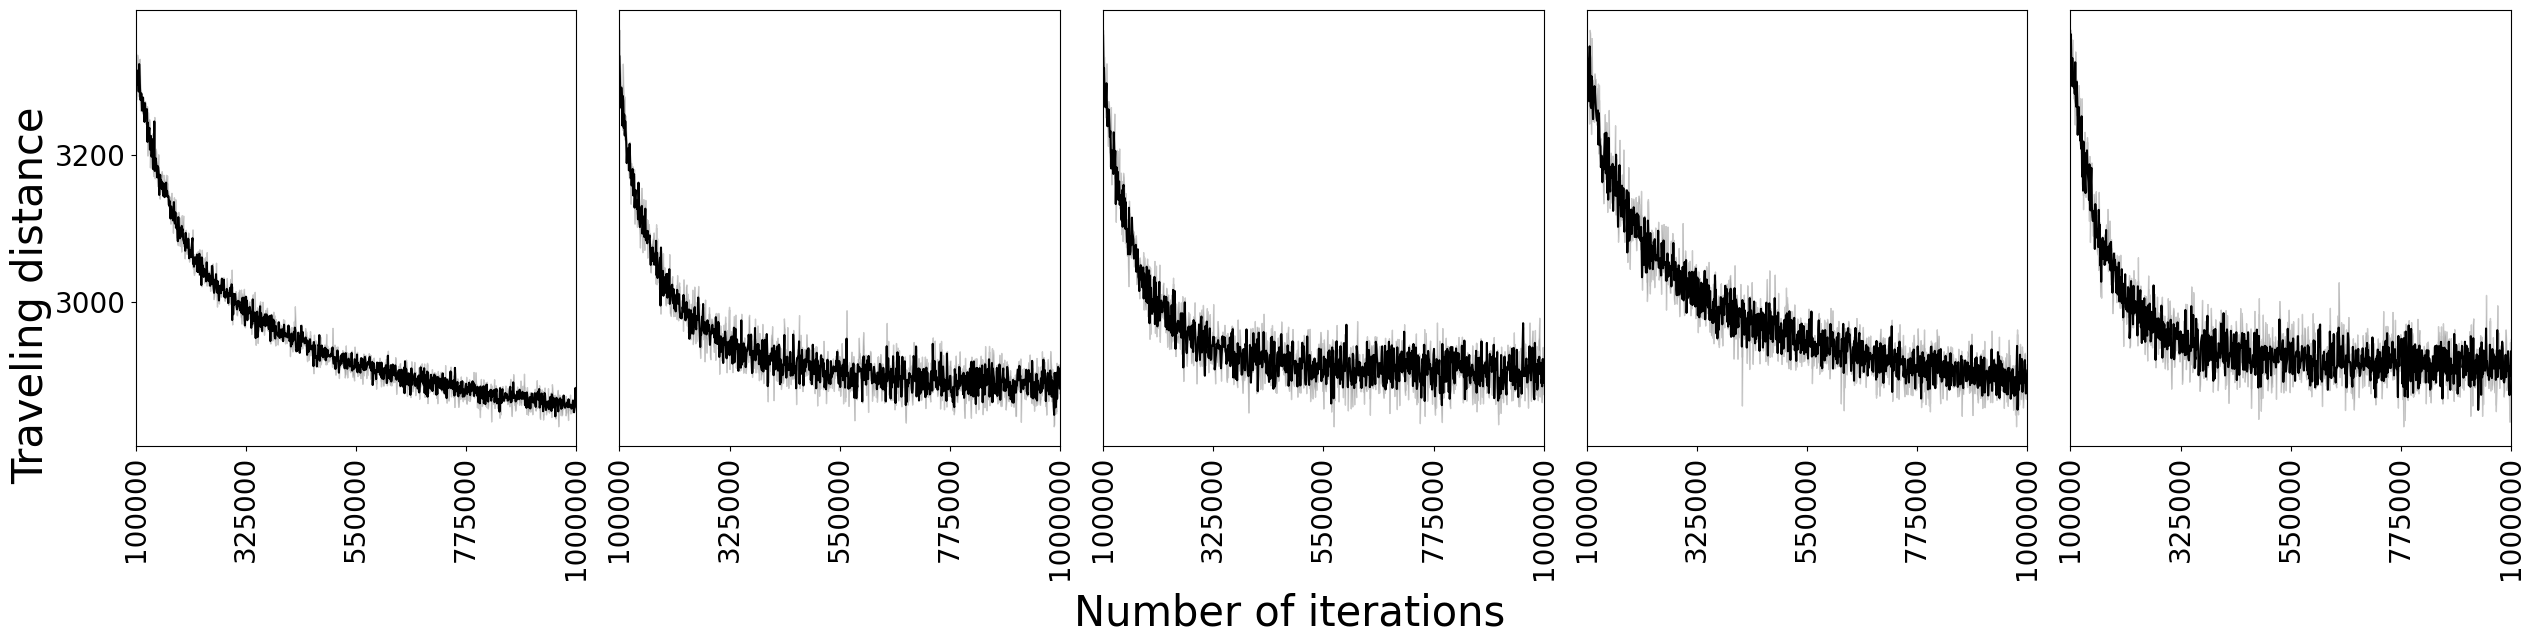

In [24]:
plt.rcParams['figure.figsize'] = (25, 6)

fig5, ax5 = plt.subplots(1, 5)

models = ['log', 'fast', 'exp', 'adaptive', 'greedy']

for i in range(5):
    sns_cost = sns.lineplot(data=df_back_tail[df_back_tail['cooling schedule'] == models[i]], x='ite', y='cost', \
                            errorbar='ci', n_boot=2, ax=ax5[i], color='k')
    # ax5[i].set_title(f'{models[i]}', fontsize=30)
    ax5[i].set_xlabel('')
    ax5[i].set_ylabel('')
    ax5[i].set_xlim(100000, 1000000)
    ax5[i].locator_params(nbins=5)
    ax5[i].tick_params(labelsize=20)
    ax5[i].set_xticks(np.linspace(100000, 1000000, 5, dtype=int), np.linspace(100000, 1000000, 5, dtype=int))
    plt.setp( ax5[i].xaxis.get_majorticklabels(), rotation=90 ) 
    
    if i != 0:
        ax5[i].tick_params(left=False, labelleft=False)

fig5.text(0.5, -0.05, 'Number of iterations', ha='center', fontsize=30)
fig5.text(-0.012, 0.5, 'Traveling distance', va='center', rotation='vertical', fontsize=30)
        
plt.tight_layout()
plt.show()

In [25]:
fig5.savefig('Plots/SA_results_30_repetitions_backtail.pdf', bbox_inches='tight')

In [26]:
df_log = pd.DataFrame(columns=['ite','cost','hyperparameter','repetition'])

for i in range(50):
    df_temp = pd.read_csv(f'Cooling_scheduling_results/50_1000000_log_experiments/data_logs_{i+1}.csv')
    df_log = pd.concat([df_log, df_temp], ignore_index=True)

In [27]:
df_log_backtail = df_log[df_log['ite'] >= 100000]

In [28]:
hyperparameters = ['41.5_1.1', '20_1.1', '1_1.1', '1_10', '1_100']

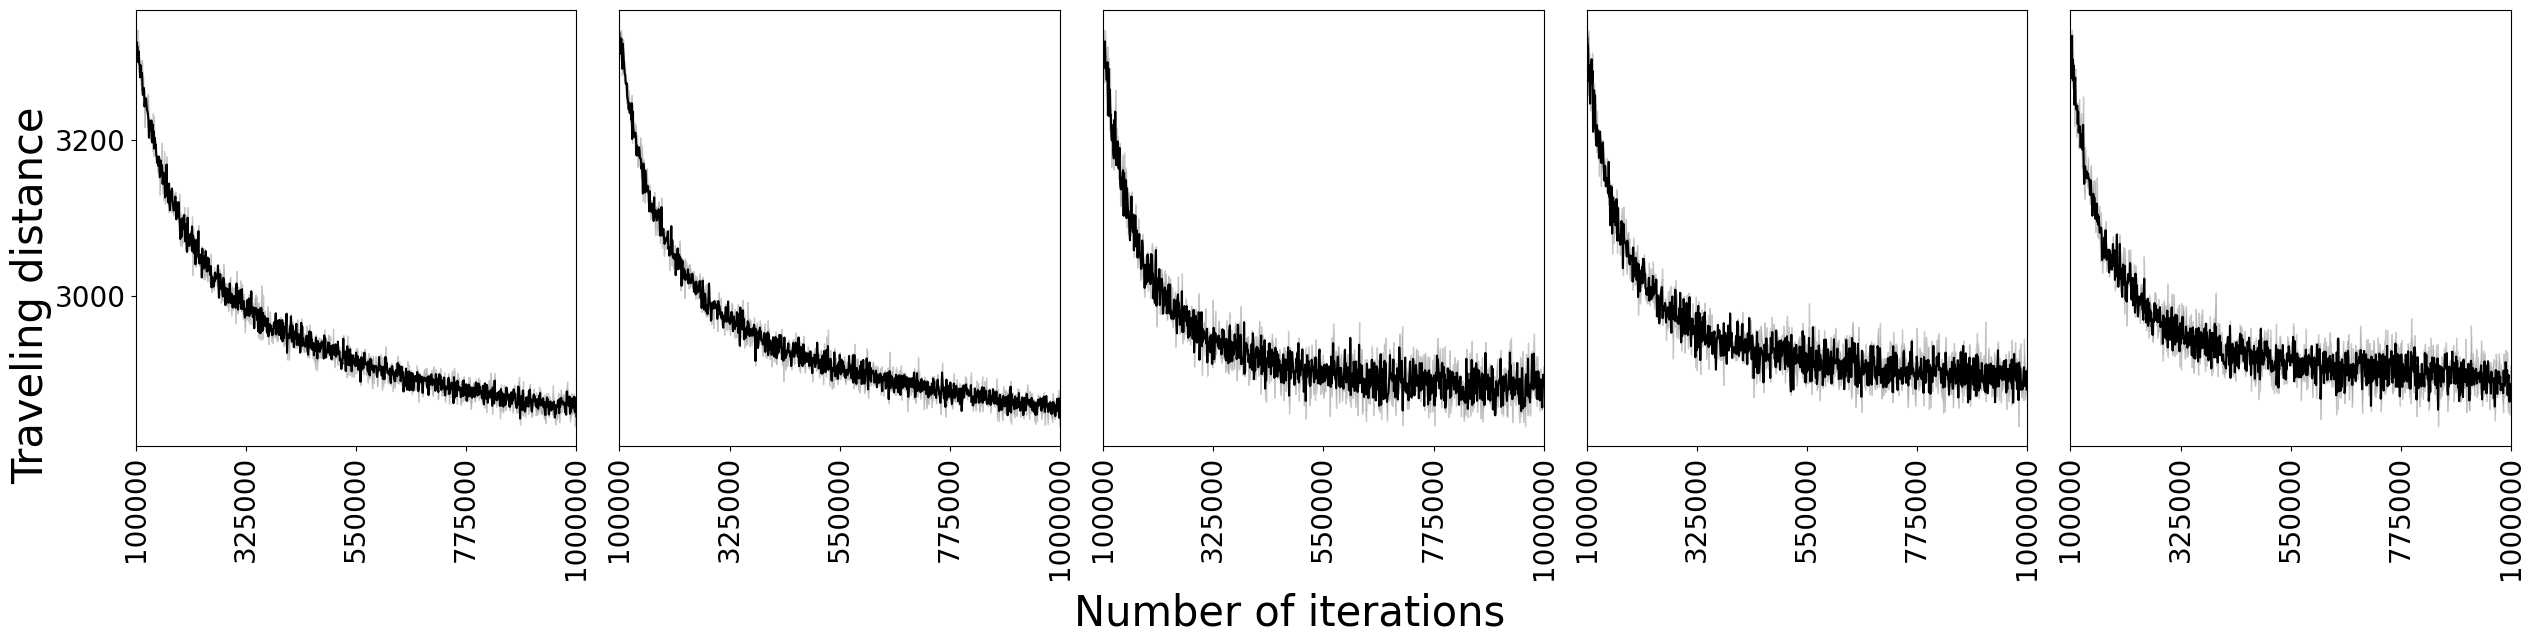

In [29]:
plt.rcParams['figure.figsize'] = (25, 6)

fig6, ax6 = plt.subplots(1, 5)

models = ['log', 'fast', 'exp', 'adaptive', 'greedy']

for i in range(5):
    sns_cost = sns.lineplot(data=df_log_backtail[df_log_backtail['hyperparameter'] == hyperparameters[i]], x='ite', y='cost', \
                            errorbar='ci', n_boot=2, ax=ax6[i], color='k')
    # ax6[i].set_title(f'{models[i]}', fontsize=30)
    ax6[i].set_xlabel('')
    ax6[i].set_ylabel('')
    ax6[i].set_xlim(100000, 1000000)
    ax6[i].locator_params(nbins=5)
    ax6[i].tick_params(labelsize=20)
    ax6[i].set_xticks(np.linspace(100000, 1000000, 5, dtype=int), np.linspace(100000, 1000000, 5, dtype=int))
    plt.setp( ax6[i].xaxis.get_majorticklabels(), rotation=90 ) 
    
    if i != 0:
        ax6[i].tick_params(left=False, labelleft=False)

fig6.text(0.5, -0.05, 'Number of iterations', ha='center', fontsize=30)
fig6.text(-0.012, 0.5, 'Traveling distance', va='center', rotation='vertical', fontsize=30)
        
plt.tight_layout()
plt.show()

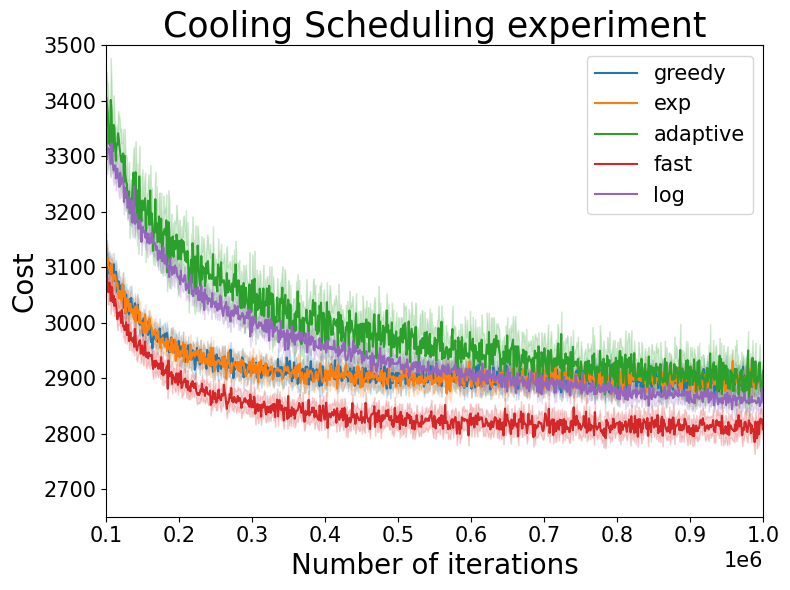

In [30]:
plt.rcParams['figure.figsize'] = (8, 6)

fig7, ax7 = plt.subplots()

hue_order = ['greedy', 'exp', 'adaptive', 'fast', 'log']

sns_1 = sns.lineplot(data=df_back_tail, x='ite', y='cost', \
                            errorbar='ci', hue='cooling schedule', \
                            hue_order=hue_order, ax=ax7)

plt.xlim(0.1e6, 1e6)
plt.xlabel('Number of iterations', fontsize=20)
plt.ylabel('Cost', fontsize=20)
legend = plt.legend(fontsize=15)
plt.title('Cooling Scheduling experiment', fontsize=25)
plt.ylim(2650, 3500)

plt.tight_layout()
plt.show()

In [31]:
fig7.savefig('Plots/SA_1e6_50_repetitions_backtail.pdf', bbox_inches='tight')

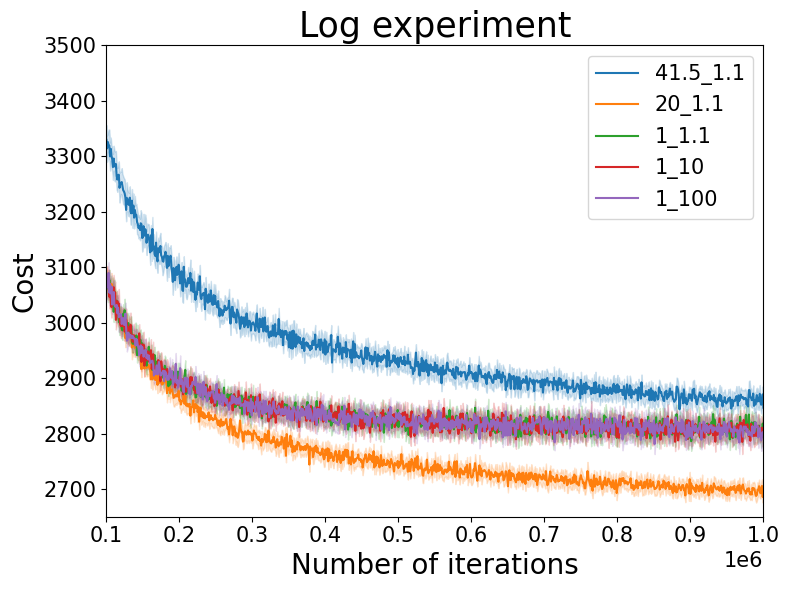

In [32]:
plt.rcParams['figure.figsize'] = (8, 6)

fig8, ax8 = plt.subplots()

sns_2 = sns.lineplot(data=df_log_backtail, x='ite', y='cost', \
                            errorbar='ci', hue='hyperparameter')

plt.xlim(0.1e6, 1e6)
plt.xlabel('Number of iterations', fontsize=20)
plt.ylabel('Cost', fontsize=20)
legend = plt.legend(fontsize=15)
plt.title('Log experiment', fontsize=25)
plt.ylim(2650, 3500)

plt.tight_layout()
plt.show()

In [33]:
fig8.savefig('Plots/SA_1e6_50_repetitions_log_backtail.pdf', bbox_inches='tight')

In [34]:
def distance_matrix(x_coordinates: np.ndarray, y_coordinates: np.ndarray) -> np.ndarray:
    """This function takes the x coordinates and y coordinates
       arrays as input, then compute the distance matrix as output

    Args:
        x_coordinates (numpy.array): Array containing the x_coordinates
        for all cities
        y_coordinates (numpy.array): Array containing the y_coordinates
        for all cities

    Returns:
        numpy.ndarray: The distance matrix for all cities
    """

    # initialize the distance matrix
    dists_matrix = np.zeros((len(x_coordinates), len(x_coordinates)))

    for i in range(len(x_coordinates)):
        # compute (x1-x2)^2
        dists_matrix[i] = (x_coordinates - x_coordinates[i])**2
        # compute (y1-y2)^2
        dists_matrix[i] += (y_coordinates - y_coordinates[i])**2
    
    # compute sqrt((x1-x2)^2 + (y1-y2)^2) (Euclidean distance)
    return np.sqrt(dists_matrix)


def objective_function(solution: list, distance_matrix: np.ndarray) -> float:
    """This function takes current solution (the city visiting
       route) and the distance matrix as input, then compute
       the total traveling distance for current solution as output

    Args:
        solution (numpy.array): The city visiting route
        distance_matrix (numpy.ndarray): The distance matrix

    Returns:
        float: the total traveling distance for current solution
    """

    # Create the route tuple of adjcent cities ([1, 2], [2, 3], ...)
    route = np.array((solution[:-1], solution[1:])).T

    # Compute and return the total distance
    return sum(distance_matrix[route[:, 0], route[:, 1]])


def log_Temp(n: int, a: float, b: float) -> float:
    """Calculate temperature based on T = a/log(n+b)

    Args:
        n (int): the iteration number
        a (float): hyperparameter
        b (float): hyperparameter

    Returns:
        float: current step temperature
    """
    T = a / np.log(n + b)
    return T

def fast_Temp(t: float, n: int) -> float:
    """Calculate temperature based on fast annealing
       T = T / (n+1)

    Args:
        t (float): last step temperature
        n (int): the iteration number

    Returns:
        float: current step temperature
    """
    T = t / float(n + 1)
    return T

def exp_Temp(t0: float, alpha: float, n: float) -> float:
    
    return t0*(alpha**n)


def adaptive_Temp(tk: float, fm: float, fk: float) -> float:
    
    mu = 1 + (fk-fm)/fk
    return mu*tk

In [35]:
T0 = 1000
T_record = [[], [], [], []]
for i in range(int(1e6)):
    T = log_Temp(i+1, a=41.5, b=1.1)
    T_record[0].append(T)
    T = fast_Temp(T0, i+1)
    T_record[2].append(T)
    T = exp_Temp(T0, 0.85, i+1)
    T_record[3].append(T)

In [36]:
adaptive_t = np.load('adaptive_t.npy', allow_pickle=True)
T_record[1] = adaptive_t

In [59]:
# Global plot settings
matplotlib.rc('xtick', labelsize=25)
matplotlib.rc('ytick', labelsize=25)
# matplotlib.rc('title', fontsize=25)

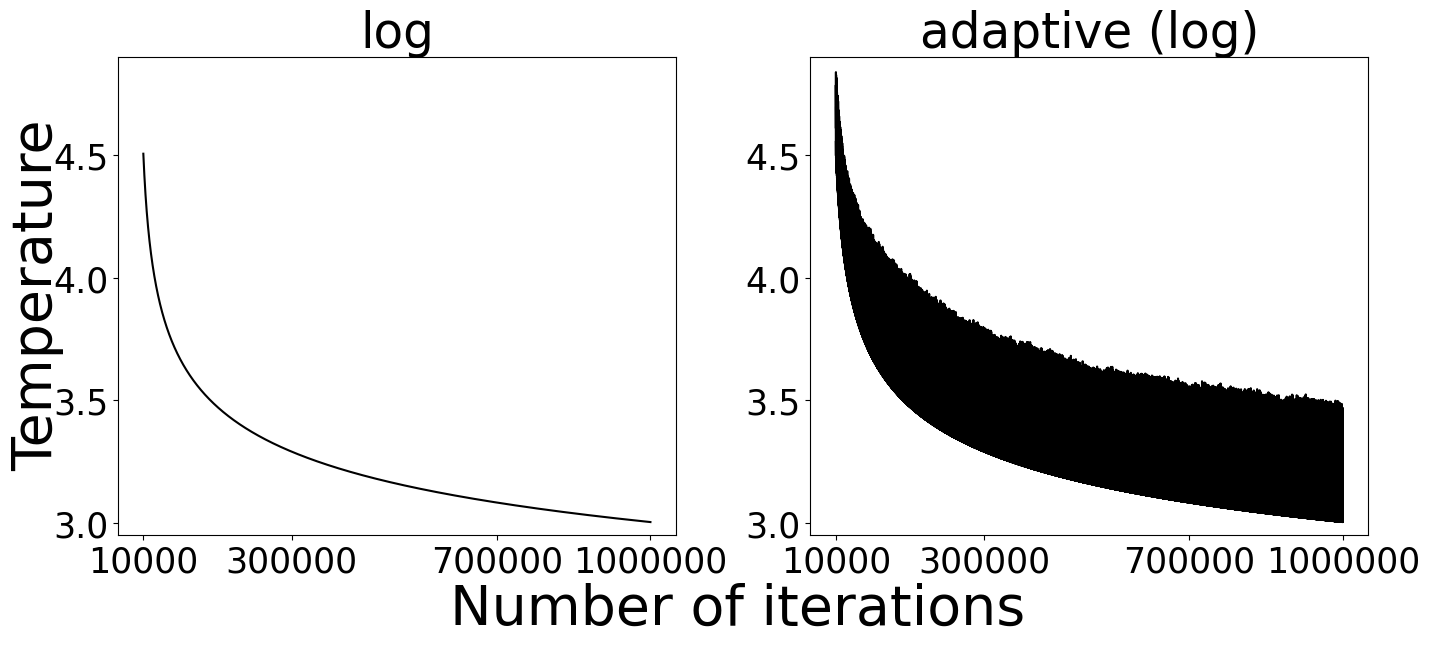

In [60]:
plt.rcParams['figure.figsize'] = (14, 6)

models = ['log', 'adaptive (log)', 'fast', 'exp']

fig9, ax9 = plt.subplots(1, 2)

for i in range(2):
    ax9[i].plot(np.arange(10000, int(1e6)), T_record[i][10000:], color='k')
    ax9[i].set_title(models[i], fontsize=35)
    
    ax9[i].set_ylim(2.95, 4.9)
    
    ax9[i].set_xticks([10000, 300000, 700000, 1000000], [10000, 300000, 700000, 1000000])

        
fig9.text(0.5, -0.05, 'Number of iterations', ha='center', fontsize=40)
fig9.text(-0.02, 0.5, 'Temperature', va='center', rotation='vertical', fontsize=40)
        
plt.tight_layout()
plt.show()

In [61]:
fig9.savefig('Plots/log_adaptive_temperature.pdf', bbox_inches='tight')

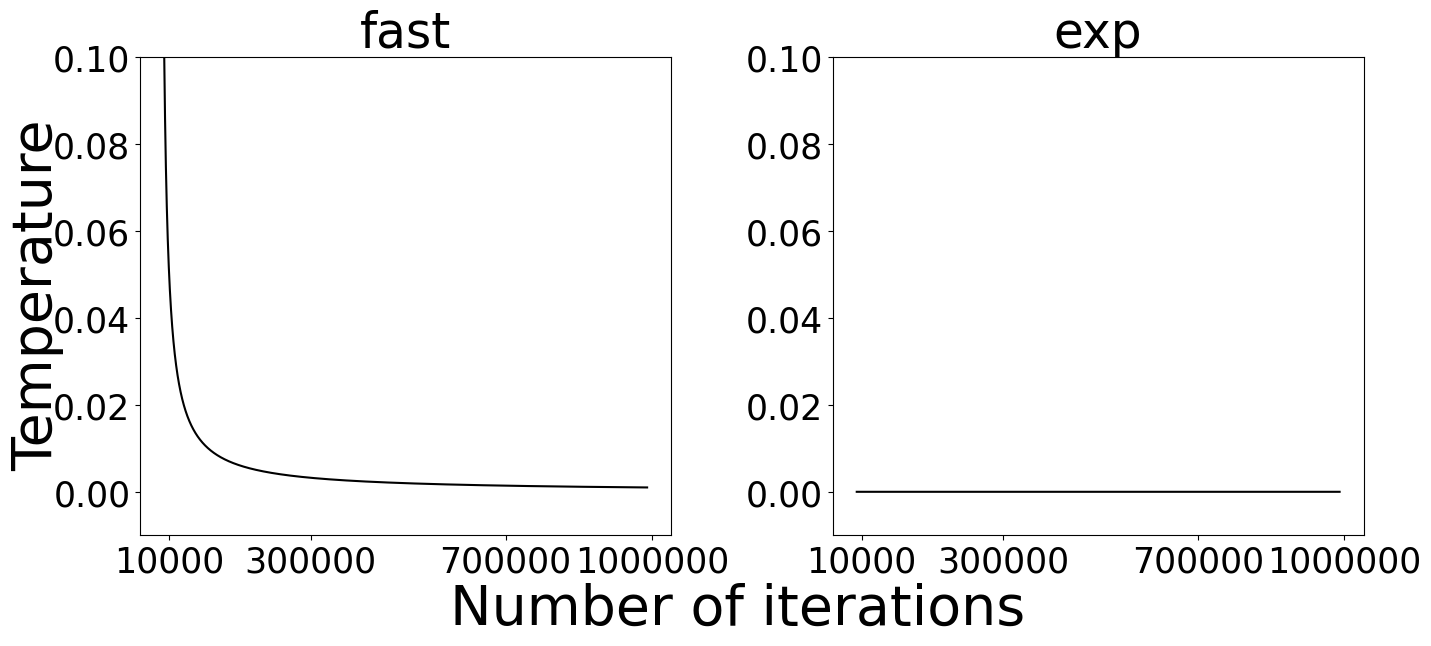

In [62]:
plt.rcParams['figure.figsize'] = (14, 6)

models = ['fast', 'exp']

fig10, ax10 = plt.subplots(1, 2)

for i in range(2):
    ax10[i].plot(T_record[i+2][10000:], color='k')
    ax10[i].set_title(models[i], fontsize=35)
    
    ax10[i].set_ylim(-0.01, 0.1)
    ax10[i].set_xticks([10000, 300000, 700000, 1000000], [10000, 300000, 700000, 1000000])
    
        
fig10.text(0.5, -0.05, 'Number of iterations', ha='center', fontsize=40)
fig10.text(-0.02, 0.5, 'Temperature', va='center', rotation='vertical', fontsize=40)
        
plt.tight_layout()
plt.show()

In [63]:
fig10.savefig('Plots/fast_exp_temperature.pdf', bbox_inches='tight')

In [41]:
T0 = 1000
T_log_record = [[], [], [], [], []]
for i in range(int(1e6)):
    T = log_Temp(i+1, a=41.5, b=1.1)
    T_log_record[0].append(T)
    T = log_Temp(i+1, a=20, b=1.1)
    T_log_record[1].append(T)
    T = log_Temp(i+1, a=1, b=1.1)
    T_log_record[2].append(T)
    T = log_Temp(i+1, a=1, b=10)
    T_log_record[3].append(T)
    T = log_Temp(i+1, a=1, b=100)
    T_log_record[4].append(T)

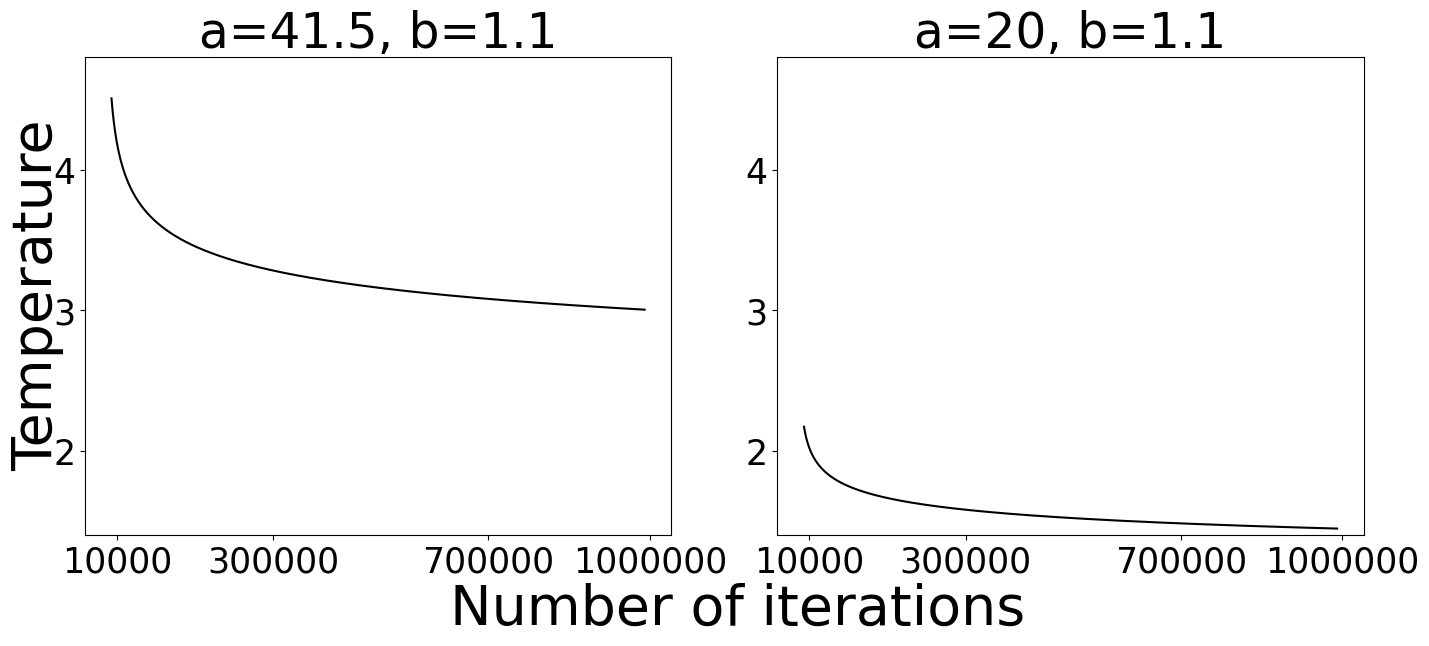

In [64]:
plt.rcParams['figure.figsize'] = (14, 6)

models = ['a=41.5, b=1.1', 'a=20, b=1.1', 'a=1, b=1.1', 'a=1, b=10', 'a=1, b=100']

fig11, ax11 = plt.subplots(1, 2)

for i in range(2):
    ax11[i].plot(T_log_record[i][10000:], color='k')
    ax11[i].set_title(models[i], fontsize=35)
    
    ax11[i].set_ylim(1.4, 4.8)
    ax11[i].set_xticks([10000, 300000, 700000, 1000000], [10000, 300000, 700000, 1000000])
    
        
fig11.text(0.5, -0.05, 'Number of iterations', ha='center', fontsize=40)
fig11.text(-0.02, 0.5, 'Temperature', va='center', rotation='vertical', fontsize=40)
        
plt.tight_layout()
plt.show()

In [65]:
fig11.savefig('Plots/log_temperature_1.pdf', bbox_inches='tight')

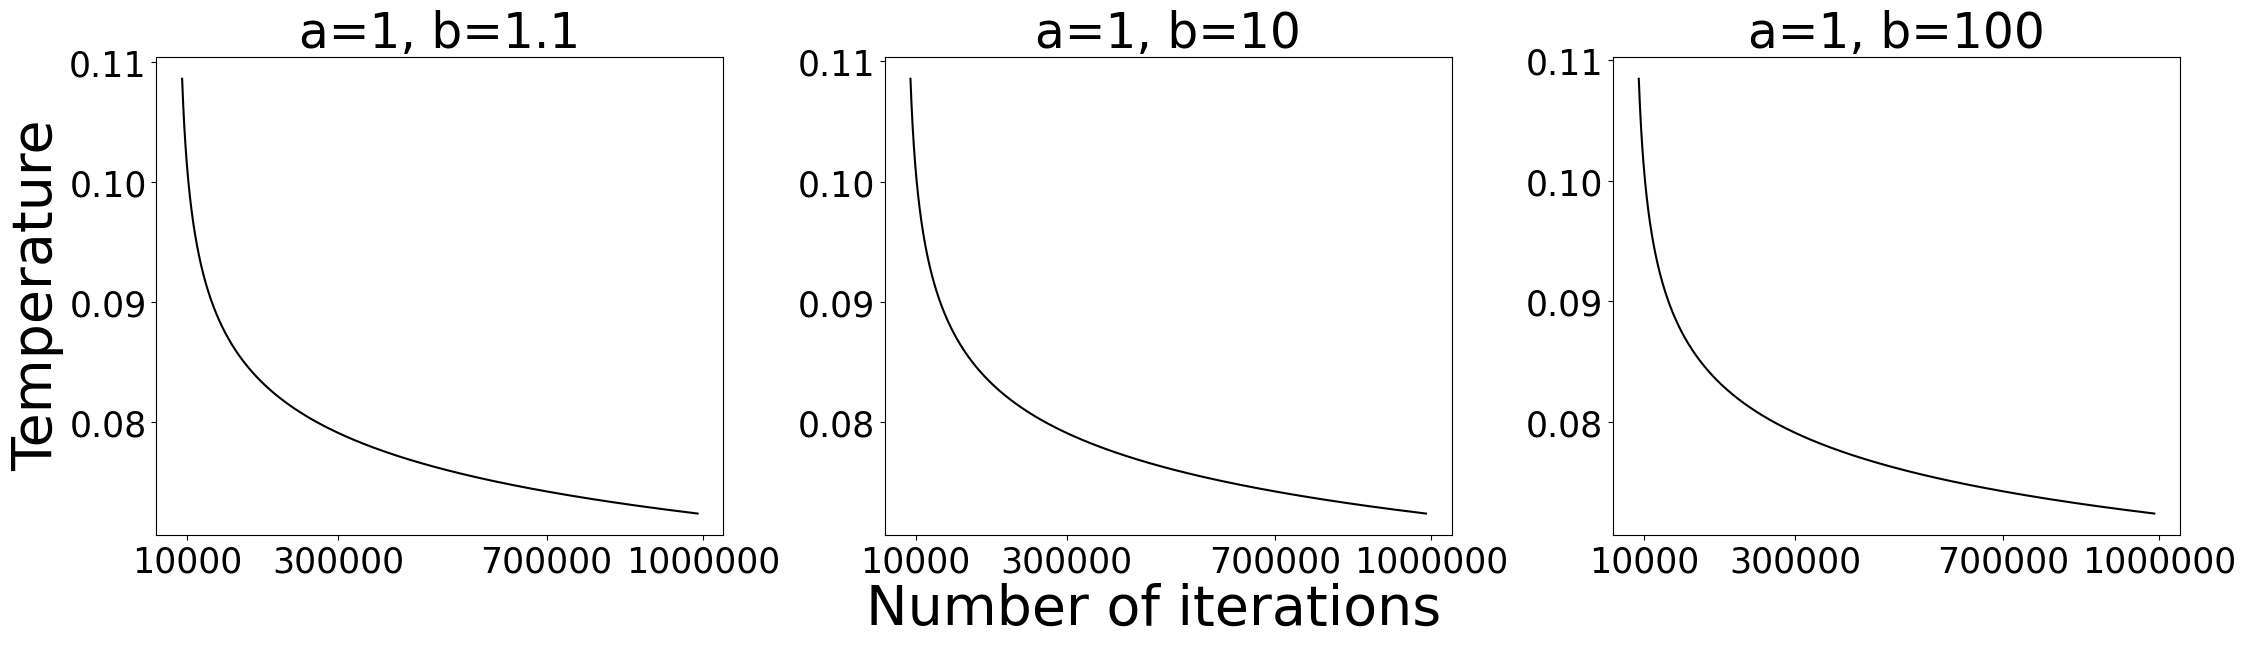

In [66]:
plt.rcParams['figure.figsize'] = (22, 6)

models = ['a=41.5, b=1.1', 'a=20, b=1.1', 'a=1, b=1.1', 'a=1, b=10', 'a=1, b=100']

fig12, ax12 = plt.subplots(1, 3)

for i in range(3):
    ax12[i].plot(T_log_record[i+2][10000:], color='k')
    ax12[i].set_title(models[i+2], fontsize=35)
    ax12[i].set_xticks([10000, 300000, 700000, 1000000], [10000, 300000, 700000, 1000000])
    
        
fig12.text(0.5, -0.05, 'Number of iterations', ha='center', fontsize=40)
fig12.text(-0.02, 0.5, 'Temperature', va='center', rotation='vertical', fontsize=40)
        
plt.tight_layout()
plt.show()

In [67]:
fig12.savefig('Plots/log_temperature_2.pdf', bbox_inches='tight')